<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab05_kernel_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5 - Kernel Methods
### Author: Szymon Nowakowski


# Introduction to Kernel Methods  
-----------------------  

Kernel methods are a class of machine learning techniques that enable models to capture complex relationships in data by mapping inputs into high-dimensional feature spaces. Instead of working directly with raw features, kernel methods rely on kernel functions that compute inner products in these transformed spaces, allowing models to discover nonlinear patterns while avoiding explicit feature transformations.  

The fundamental idea behind kernel methods is to leverage the **kernel trick**, which replaces explicit high-dimensional computations with efficient similarity measurements. This approach is particularly useful in algorithms like **Support Vector Machines (SVMs)**, **kernel regression**, and **Gaussian processes**, where the goal is to find decision boundaries or make predictions in feature spaces that may be infeasible to compute directly.  

Kernel methods are crucial for problems where linear models fail to capture the underlying structure, enabling flexible, nonlinear decision functions without excessive computational cost. They also provide a principled framework for incorporating domain knowledge through custom kernel functions, making them widely applicable across diverse fields such as bioinformatics, computer vision, and natural language processing.


# Support Vector Machines (SVMs) and Margin Boundaries for Separable Case
------------------------

In **Support Vector Machines (SVMs)**, we want to find the **maximum margin separator**, which is a hyperplane that separates two classes while maximizing the margin. The **decision boundary** is given by:

$$ w^\top x + b = 0 $$

However, the margin itself is defined by **two additional hyperplanes** that run parallel to the decision boundary. These **margin boundaries** are:

$$ w^\top x + b = +1 \quad \text{(for the positive class)} $$  
$$ w^\top x + b = -1 \quad \text{(for the negative class)} $$  

These specific values $ \pm 1 $ come from the **normalization condition** we impose during the SVM optimization. Let's break this down step by step.





## 1. The Role of the Margin Boundaries

We want to ensure that all correctly classified points satisfy:

$$ y_i (w^\top x_i + b) \geq 1, \quad \forall i. $$

This means:

- If $ y_i = +1 $ (positive class), we require:

  $$ w^\top x_i + b \geq 1. $$

- If $ y_i = -1 $ (negative class), we require:

  $$ w^\top x_i + b \leq -1. $$

These two conditions define **two parallel hyperplanes** that **contain the closest data points** (support vectors).


We shall reproduce Figure 12.2 from *The Elements of Statistical Learning*

📚 **See also** → *The Elements of Statistical Learning*:  
Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer, 2009.  
[📖 Link to the book](https://hastie.su.domains/ElemStatLearn/)
(Chapter 12, Figure 12.2)


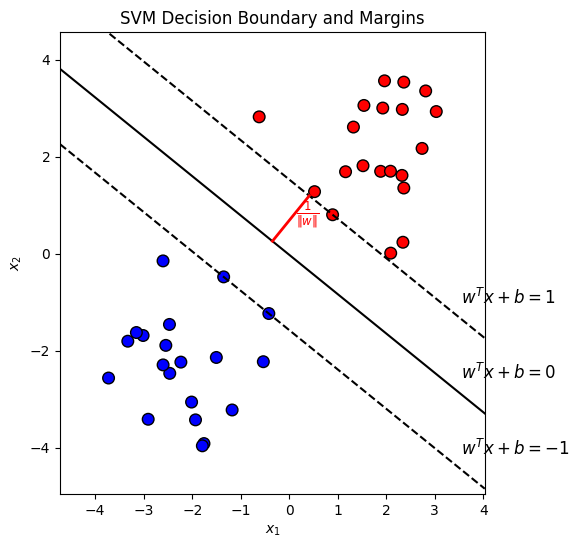

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Generate linearly separable data
np.random.seed(42)
X = np.r_[
    np.random.randn(20, 2) - [2, 2],
    np.random.randn(20, 2) + [2, 2]
]
y = np.array([0]*20 + [1]*20)

# 2. Train a linear SVM
clf = SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Extract parameters w and b from the trained model
w = clf.coef_[0]      # [w1, w2]
b = clf.intercept_[0] # scalar bias

# 3. Create a grid of x-values for plotting the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x_min, x_max, 200)

# Decision boundary: w^T x + b = 0 ==> x2 = -(w1*x1 + b)/w2
def line_y(x, offset=0.0):
    return -(w[0]*x + (b - offset)) / w[1]

y_decision = line_y(x_plot, offset=0)
y_margin_plus = line_y(x_plot, offset=1)   # w^T x + b = 1
y_margin_minus = line_y(x_plot, offset=-1) # w^T x + b = -1

# 4. Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=70)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(x_min, x_max)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.title('SVM Decision Boundary and Margins')

# Plot the decision boundary (solid line)
plt.plot(x_plot, y_decision, 'k-')
# Plot the margins (dashed lines)
plt.plot(x_plot, y_margin_plus, 'k--')
plt.plot(x_plot, y_margin_minus, 'k--')

# 5. Label the lines directly on the plot (instead of using a legend)
# Choose some x-value near the right side for placing text
x_text = x_max - 0.5
# Decision boundary label
y_text_decision = line_y(x_text, offset=0)
plt.text(x_text, y_text_decision + 0.3, r'$w^T x + b = 0$', fontsize=12)

# +1 margin label
y_text_plus = line_y(x_text, offset=1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = 1$', fontsize=12)

# -1 margin label
y_text_plus = line_y(x_text, offset=-1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = -1$', fontsize=12)

# 6. Draw and label the orthogonal distance 1/||w||
# Pick a point on the decision boundary in the middle of the plot
x_center = (x_min + x_max) / 2
y_center = line_y(x_center, offset=0)  # on the boundary
center_point = np.array([x_center, y_center])

# The direction normal to the boundary is parallel to w
w_norm = np.linalg.norm(w)
direction = w / w_norm

# One endpoint on the decision boundary, the other on the margin w^T x + b = 1
# The distance between them along w is 1 / ||w||
margin_point = center_point + (1 / w_norm) * direction

# Plot the orthogonal line segment
plt.plot([center_point[0], margin_point[0]],
         [center_point[1], margin_point[1]], 'r-', lw=2)

# Label the distance 1/||w|| near the midpoint of that segment
mid_point = (center_point + margin_point) / 2
plt.text(mid_point[0] + 0.1, mid_point[1], r'$\frac{1}{\|w\|}$', color='r', fontsize=12)


plt.gca().set_aspect('equal')   #make the plot exactly rectangular to keep orthogonal lines - well, orthogonal
plt.show()
